In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from plot_functions import adjustAxeProperties

In [3]:
from binary_logistic_regression import BinaryLogisticRegression

In [4]:
file_path = './ex2data1.txt'
column_names = ['exam1_score', 'exam2_score', 'label']
feature_names = column_names[:-1]
label_name = column_names[-1]

In [5]:
raw_data = pd.read_csv(file_path, header=None, names=column_names)
raw_data.head(6)

,exam1_score,exam2_score,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0


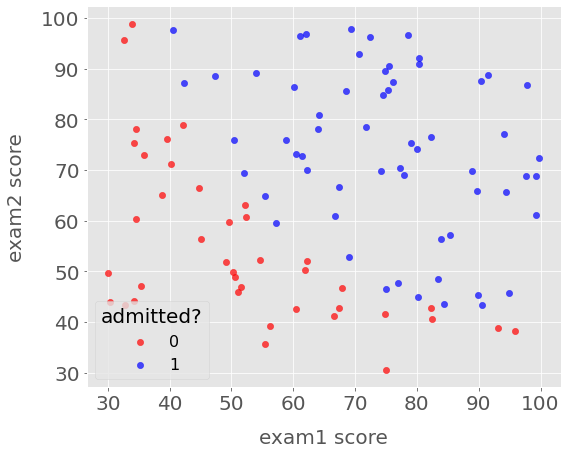

In [6]:
fontsize = 20
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8.5, 7))

cdict = {0: 'red', 1: 'blue'} 
for c in [0, 1]:
    mask = raw_data['label'] == c
    ax.scatter(raw_data[mask]['exam1_score'], raw_data[mask]['exam2_score'], c=cdict[c], s=40, alpha=0.7, label=c)
l = ax.legend(title='admitted?', loc='best', fontsize=fontsize*0.8)  
plt.setp(l.get_title(),fontsize=fontsize)

ax.set_xlabel('exam1 score', fontsize=fontsize, labelpad=15)
ax.set_ylabel('exam2 score', fontsize=fontsize, labelpad=15)

adjustAxeProperties(ax, fontsize, 0, fontsize, 0)

In [7]:
means = raw_data[feature_names].mean(axis=0)  # type: pd.Series
stds = raw_data[feature_names].std(axis=0)    # type: pd.Series

In [8]:
X = (raw_data[feature_names] - means)/stds
Y = raw_data[label_name]

In [9]:
lr_model = BinaryLogisticRegression(2)

In [10]:
cost_history, accuracy_history = lr_model.fit(X.values, Y.values)

In [11]:
lr_model.w, lr_model.b

(array([7.02658908, 4.33356354]), 2.4292906432660635)

In [12]:
def plot_training_history(values):
    plt.close('all')
    fig, ax = plt.subplots(1, figsize=(9, 7))
    ax.plot(values)    

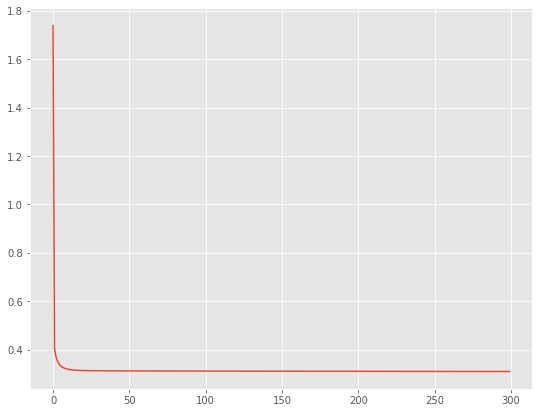

In [13]:
plot_training_history(cost_history)

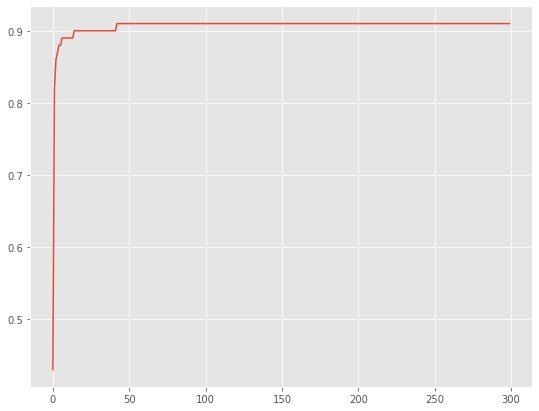

In [14]:
plot_training_history(accuracy_history)